## Exploratory Data Analysis

### Setup

In [2]:
# Importing packages
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib as plt
import seaborn as sns
import statsmodels.api as sm
from plotnine import ggplot, aes, geom_point
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Reading in data
deco_clean = pd.read_csv("./Data/deco_clean.csv") # Cleaned data
deco = pd.read_csv("./Data/DECO_v.1.0.csv") # Raw data


## Display all columns
pd.set_option('display.max_columns', None)

c:\Users\samue\anaconda4\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\samue\AppData\Local\Temp\ipykernel_31384\3493122286.py:19: DtypeWarning: Columns (24,30,33) have mixed types. Specify dtype option on import or set low_memory=False.


### Summary statistics

In [2]:
# Describing numerical data
deco_clean.describe()

,id,type_of_violence,conflict_new_id,dyad_new_id,side_a_new_id,side_b_new_id,country_id,year,deaths_a,deaths_b,civilian_deaths,unknown,best,high,low,latitude,electoral_vio,electoral_vio_uncertainty,electoral_side_a_inc,electoral_side_b_inc,electoral_perpetrator,ucdp_ged,Afghanistan,Albania,Algeria,Angola,Bangladesh,Benin,Bolivia,Brazil,Burundi,Cambodia (Kampuchea),Central African Republic,Colombia,Congo,DR Congo (Zaire),Djibouti,Dominican Republic,Ecuador,Egypt,El Salvador,Ethiopia,Fiji,Gambia,Georgia,Ghana,Guatemala,Guinea,Guinea-Bissau,Haiti,Honduras,India,Indonesia,Iran,Iraq,Israel,Italy,Ivory Coast,Jamaica,Kenya,Kosovo,Kyrgyzstan,Lebanon,Lesotho,Libya,Madagascar (Malagasy),Malawi,Malaysia,Mali,Mauritania,Mexico,Moldova,Mozambique,Myanmar (Burma),Namibia,Nepal,Nicaragua,Nigeria,Pakistan,Papua New Guinea,Peru,Philippines,Russia (Soviet Union),Senegal,Serbia (Yugoslavia),Sierra Leone,Somalia,South Africa,Spain,Sri Lanka,Sudan,Tanzania,Thailand,Tunisia,Turkey,Uganda,Ukraine,United Kingdom,Venezuela,Yemen (North Yemen),Zambia,Zimbabwe (Rhodesia),Africa,Americas,Asia,Europe,Middle East,electoral_vio_uncertainty_0,electoral_vio_uncertainty_1,electoral_vio_uncertainty_2,type_of_violence_1,type_of_violence_2,type_of_violence_3,type_of_violence_4,electoral_perpetrator_1,electoral_perpetrator_2,electoral_perpetrator_3,electoral_perpetrator_4,side_a_Civilians,side_a_ExternActors,side_a_Militia,side_a_Other,side_a_PoliticalSupporters,side_a_Politicians,Public officials,side_a_RebelGroup,side_a_SecurityForces,side_a_Unclear,side_b_Civilians,side_b_Militia,side_b_Other,side_b_PoliticalSupporters,side_b_Politicians,side_b_PublicOfficials,side_b_RebelGroup,side_b_SecurityForces,side_b_Unclear,electoral_purpose_disrupt,electoral_purpose_divergent affiliations,electoral_purpose_crack down on protest and/or riot,electoral_purpose_protect results,electoral_purpose_unclear,electoral_purpose_spell,electoral_purpose_eliminate opponent,electoral_purpose_retaliate violent acts,electoral_purpose_overturn results,electoral_purpose_secure elections,electoral_purpose_preemptive violence,electoral_purpose_prevent from voting,electoral_purpose_shape results,electoral_purpose_retaliate for voting for other candidate,electoral_purpose_repress opposition,electoral_purpose_punishment,electoral_purpose_crack down on prostest and/or riot,electoral_purpose_oppose democratic conduct,electoral_purpose_intimidate opponent,electoral_purpose_demand democratic conduct,electoral_purpose_hinder electoral misconduct,electoral_purpose_retaliate for voting for alternative candidate,electoral_purpose_crack down on riot and/or protest,electoral_purpose_retaliate for voting for candidate,electoral_purpose_forcibly displace groups in order to shape results,electoral_purpose_retaliate acts in electoral process,electoral_purpose_prevent electoral misconduct,electoral_purpose_Unknown,electoral_purpose_secure election,electoral_purpose_crackdown on protest and/or riot,electoral_purpose_call for change in electoral process,electoral_purpose_Secure elections,electoral_purpose_intimidate voters,electoral_purpose_crack down on riots and/or protests,electoral_purpose_.,electoral_purpose_crack down on protest and/or riot/retaliate violent events,electoral_purpose_Unclear,electoral_purpose_diverging affiliations,electoral_targets_2,electoral_targets_6,electoral_targets_3,electoral_targets_5,electoral_targets_10,electoral_targets_1,electoral_targets_9,electoral_targets_7,electoral_targets_11,electoral_targets_-99,electoral_targets_8,electoral_targets_4,electoral_type_2,electoral_type_1,electoral_type_3,electoral_type_4,electoral_type_5,"electoral_type_2,3","electoral_type_1,3","electoral_type_1,4",electoral_timing_2,electoral_timing_1,electoral_timing_3,electoral_timing_4,electoral_timing_8,year_string,Year,GDP (constant 2015 US$),GDP growth (annual %),GDP per capita (constant 2015 US$),Gini index,"Inflation, consumer prices (annual %)",Political Stability and Absence of Violence/Terrori

In [3]:
# Describing and analyzing categorical variables
deco_clean_objects = list(deco_clean.select_dtypes(include="object"))
deco_clean[deco_clean_objects].describe()

,conflict_name,side_a,side_b,country,region,source_article,date_start,date_end,longitude,electoral_vio_source,electoral_purpose,electoral_side_a,electoral_side_a_2,electoral_side_b,electoral_side_b_2,electoral_targets,electoral_type,electoral_timing,relid,country_new,Country_x,Abbreviation,country_year,Country_y,Country Abbreviation
count,4233,4233,4233,4233,4233,4233,4233,4233,4233,4233,4233,4233,259,4233,2,4233,4233,4233,4233,4233,4233,4233,4233,4233,4233
unique,575,391,380,80,5,2854,2389,2405,2084,87,57,10,5,9,2,46,18,10,4233,80,80,80,465,80,80
top,Supporters of ANC - Supporters of IFP,Government of India,Civilians,India,Africa,TRC Report,2017-08-11,2011-04-20,29.3644,None/Unknown,disrupt,Security forces,Security forces,Political supporters,Political supporters,3,1,1,YEM-2012-1-X2626-4,India,India,IND,ZAF1993,India,IND
freq,378,400,1376,648,1955,511,18,19,64,3261,1100,1558,167,1724,1,1594,932,2398,1,648,648,648,313,648,648


### Correlation Matrix

<Axes: >

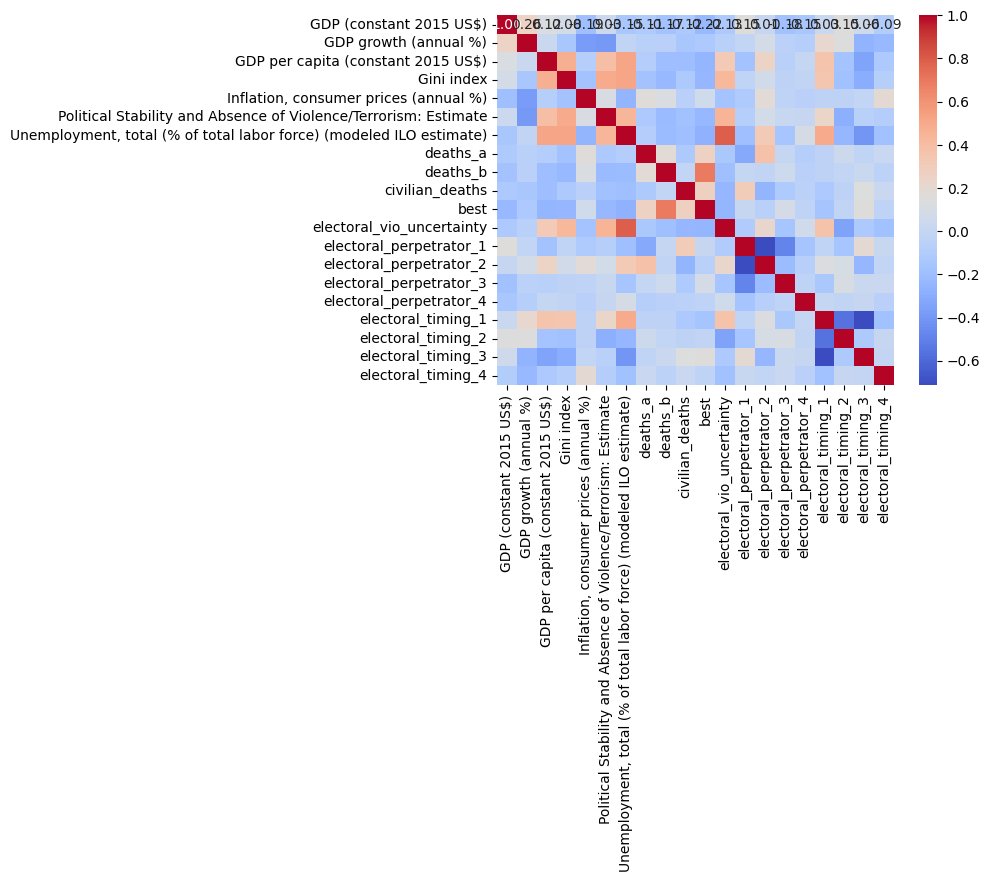

In [5]:

# Compute correlation matrix
deco_clean_corr = deco_clean.loc[:,['GDP (constant 2015 US$)',
                                    'GDP growth (annual %)',
                                    'GDP per capita (constant 2015 US$)',
                                    'Gini index',
                                    'Inflation, consumer prices (annual %)',
                                    'Political Stability and Absence of Violence/Terrorism: Estimate',
                                    'Unemployment, total (% of total labor force) (modeled ILO estimate)',
                                    'deaths_a',
                                    'deaths_b',
                                    'civilian_deaths',
                                    'best',
                                    'electoral_vio_uncertainty',
                                    'electoral_perpetrator_1',
                                    'electoral_perpetrator_2',
                                    'electoral_perpetrator_3',
                                    'electoral_perpetrator_4',
                                    'electoral_timing_1',
                                    'electoral_timing_2',
                                    'electoral_timing_3',
                                    'electoral_timing_4'
                            ]].corr()

corr_matrix = deco_clean_corr.corr()

# Create heatmap
#plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
#plt.title('Correlation Heatmap')
#plt.show()

### Plots, tables, and visualizations

#### Functions

In [6]:
# Functions

## Value count function
def count_by(df, column):
    result = ( 
            df. 
             groupby(column). 
             size(). 
             reset_index(name="n").
             sort_values(by="n", ascending=False)
        ) 
    return result

## Histogram
def create_histogram(df,col,bins):
    sns.histplot(df[col], bins=bins, color='skyblue', edgecolor='black')

## Bivaraite regression function
def bivariate_regression(df_Y, df_X):
    model = sm.OLS(df_Y, df_X)
    results = model.fit()
    print(results.summary())
    


#### Certainty of electoral violence value counts (target class)

<Axes: xlabel='electoral_vio_uncertainty'>

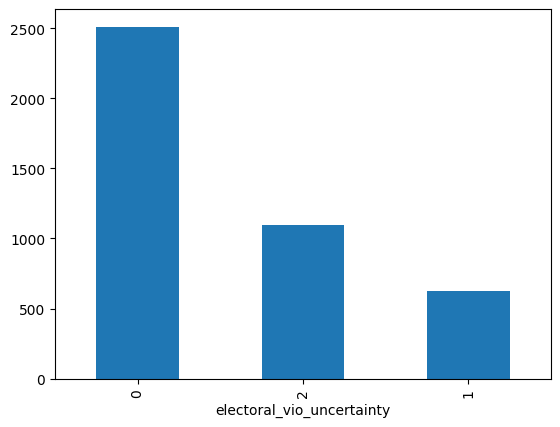

In [4]:
deco_clean.electoral_vio_uncertainty.value_counts().plot(kind="bar")

#### Electoral Violence by country and region

<Axes: xlabel='region'>

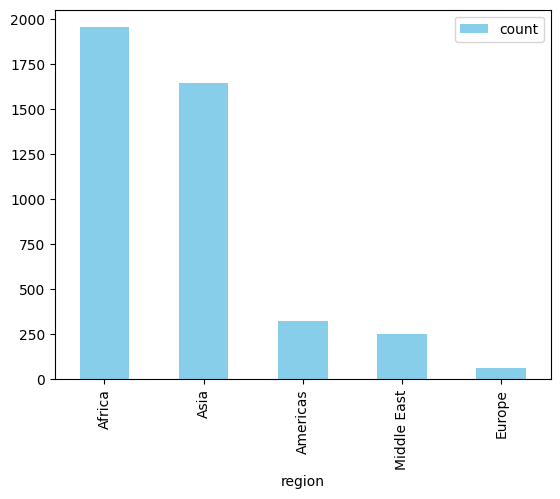

In [42]:
# Events by region
pd.DataFrame(deco.region.value_counts()).plot(kind='bar', color='skyblue')

[Text(0, 0, 'India'),
 Text(1, 0, 'South Africa'),
 Text(2, 0, 'Kenya'),
 Text(3, 0, 'Afghanistan'),
 Text(4, 0, 'Nigeria'),
 Text(5, 0, 'Indonesia'),
 Text(6, 0, 'Bangladesh'),
 Text(7, 0, 'Philippines'),
 Text(8, 0, 'Burundi'),
 Text(9, 0, 'Iraq'),
 Text(10, 0, 'Somalia'),
 Text(11, 0, 'Colombia'),
 Text(12, 0, 'Ivory Coast'),
 Text(13, 0, 'Pakistan'),
 Text(14, 0, 'Algeria'),
 Text(15, 0, 'DR Congo (Zaire)'),
 Text(16, 0, 'Peru'),
 Text(17, 0, 'Mexico'),
 Text(18, 0, 'Sri Lanka'),
 Text(19, 0, 'Sudan'),
 Text(20, 0, 'Zimbabwe (Rhodesia)'),
 Text(21, 0, 'Guinea'),
 Text(22, 0, 'Madagascar (Malagasy)'),
 Text(23, 0, 'Egypt'),
 Text(24, 0, 'Yemen (North Yemen)')]

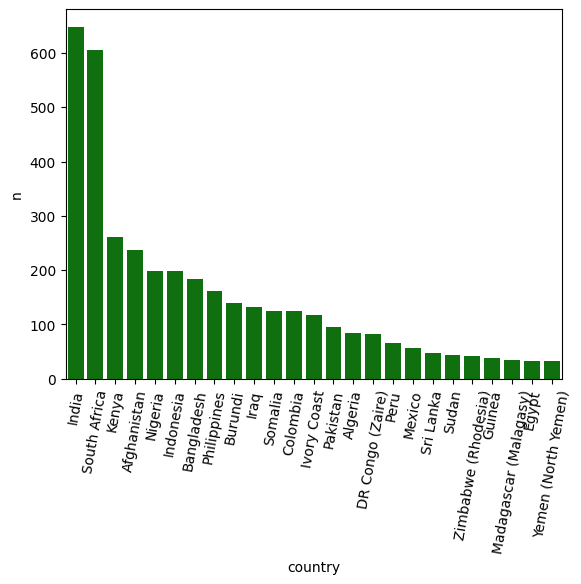

In [66]:
# Electoral violence events by country

## creating data frame for countries by counts (n), ordered
countries_by_n = ( 
            deco_clean. 
             groupby("country"). 
             size(). 
             reset_index(name="n").
             sort_values(by="n", ascending=False)
        )[:25] # top 25

## plot
countries_by_n_plot = sns.barplot(x='country', y="n",color="green",data=countries_by_n)
## cleaning
countries_by_n_plot.set_xticklabels(countries_by_n_plot.get_xticklabels(), rotation=80)

[Text(0, 0, 'India'),
 Text(1, 0, 'Nigeria'),
 Text(2, 0, 'Kenya'),
 Text(3, 0, 'Ivory Coast'),
 Text(4, 0, 'Afghanistan'),
 Text(5, 0, 'South Africa'),
 Text(6, 0, 'Ethiopia'),
 Text(7, 0, 'Sudan'),
 Text(8, 0, 'DR Congo (Zaire)'),
 Text(9, 0, 'Indonesia'),
 Text(10, 0, 'Peru'),
 Text(11, 0, 'Iraq'),
 Text(12, 0, 'Colombia'),
 Text(13, 0, 'Pakistan'),
 Text(14, 0, 'Somalia'),
 Text(15, 0, 'Philippines'),
 Text(16, 0, 'Russia (Soviet Union)'),
 Text(17, 0, 'Burundi'),
 Text(18, 0, 'Algeria'),
 Text(19, 0, 'Bangladesh'),
 Text(20, 0, 'Sri Lanka'),
 Text(21, 0, 'Guinea'),
 Text(22, 0, 'Libya'),
 Text(23, 0, 'Mexico'),
 Text(24, 0, 'Papua New Guinea')]

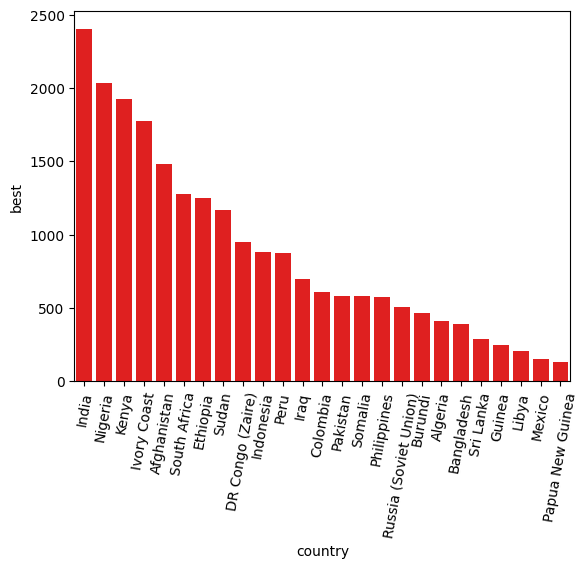

In [ ]:
# Total deaths due to electoral violence by country (best estimates)

## creating data frame for countries by best estimates of deaths, ordered
total_deaths_by_country = deco_clean.groupby('country')['best'].sum().reset_index().sort_values(by="best", ascending=False)[:25] # Top 25

## cleaning
total_deaths_plot = sns.barplot(x='country', y="best",color="red",data=total_deaths_by_country)
total_deaths_plot.set_xticklabels(total_deaths_plot.get_xticklabels(), rotation=80)

#### Deaths

In [64]:
# counts of deaths by count bin
count_by(deco_clean, "best")[:25] # top 25

,best,n
0,1,2000
1,2,657
2,3,384
3,4,243
4,5,161
5,6,126
6,7,98
7,8,82
8,9,52
9,10,50


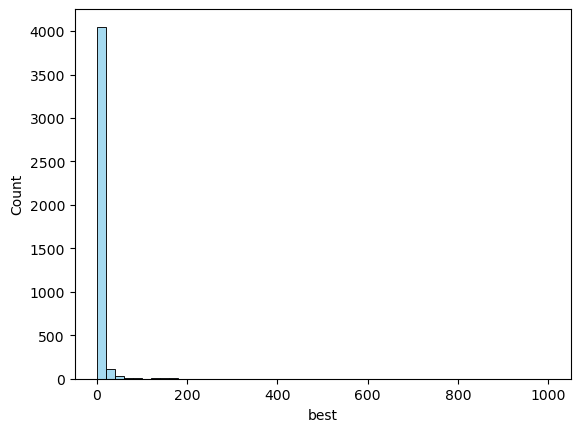

In [80]:
create_histogram(deco_clean[deco_clean["best"]>=1], "best", 50)

<Axes: xlabel='year'>

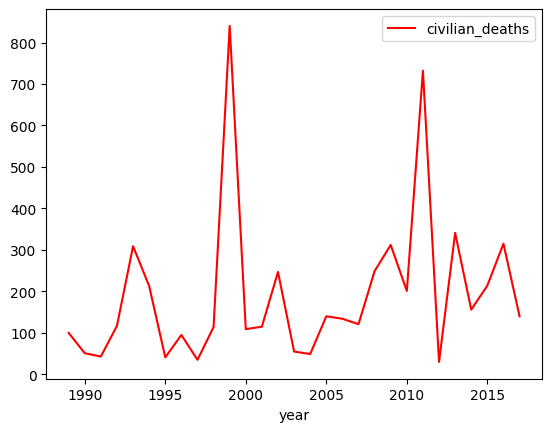

In [58]:
# Civlian deaths over time
(deco.groupby('year').sum('civilian_deaths').filter(['year','civilian_deaths'])).plot(kind='line', color='red')

#### Electoral purposes and timing

In [ ]:
#count of instances of electoral purposes
count_by(deco_clean, "electoral_purpose")[:25] # top 25

,electoral_purpose,n
18,disrupt,1100
23,divergent affiliations,1065
55,spell,531
51,secure elections,272
6,crack down on protest and/or riot,262
28,eliminate opponent,255
56,unclear,117
37,preemptive violence,72
34,overturn results,71
49,retaliate for voting for other candidate,65


In [148]:
#count of instances of electoral timing
count_by(deco_clean, "electoral_timing")

,electoral_timing,n
0,1,2398
8,3,1032
5,2,522
3,1;3,237
9,4,32
6,2;3,5
1,1;2,3
2,1;2;3,2
4,1;3;8,1
7,2;3;8,1


#### Electoral Targets

In [ ]:
#count of instances of electoral targets
count_by(deco_clean, "electoral_targets")[:25] # top 25


,electoral_targets,n
16,3,1594
1,1,489
31,6,453
39,7,426
43,9,408
27,5,278
36,6;7,122
11,2,82
25,3;9,49
0,-99,42


In [150]:
#count of instances of electoral targets
count_by(deco_clean, "electoral_type")

,electoral_type,n
0,1,932
11,3,927
8,2,801
1,"1,3",744
17,5,243
3,1;2,192
15,4,104
9,2;3,85
4,"1;2,3",75
5,1;2;3,54


#### Deaths and political instability

<Axes: xlabel='Political Stability and Absence of Violence/Terrorism: Estimate', ylabel='best'>

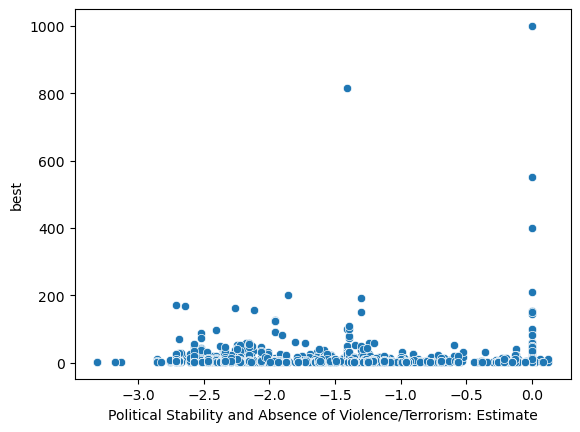

In [168]:
# Scatter plot: deaths and political instability
sns.scatterplot(x=deco_clean[deco_clean['best']>1]['Political Stability and Absence of Violence/Terrorism: Estimate'], y=deco_clean[deco_clean['best']>1]['best'])


#### GDP per capita and instability

<Axes: xlabel='GDP per capita (constant 2015 US$)', ylabel='Political Stability and Absence of Violence/Terrorism: Estimate'>

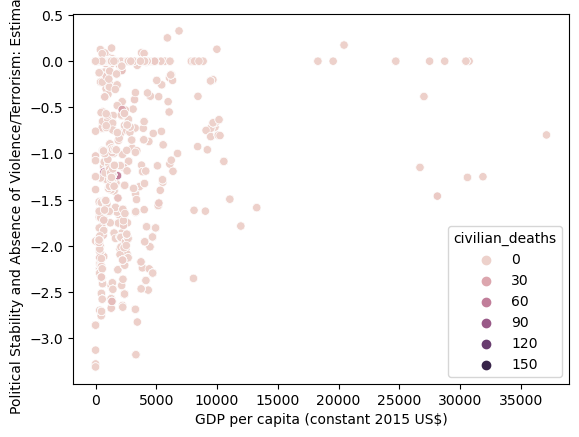

In [253]:
sns.scatterplot(x=deco_clean['GDP per capita (constant 2015 US$)'], y=deco_clean['Political Stability and Absence of Violence/Terrorism: Estimate'], hue=deco_clean["civilian_deaths"])


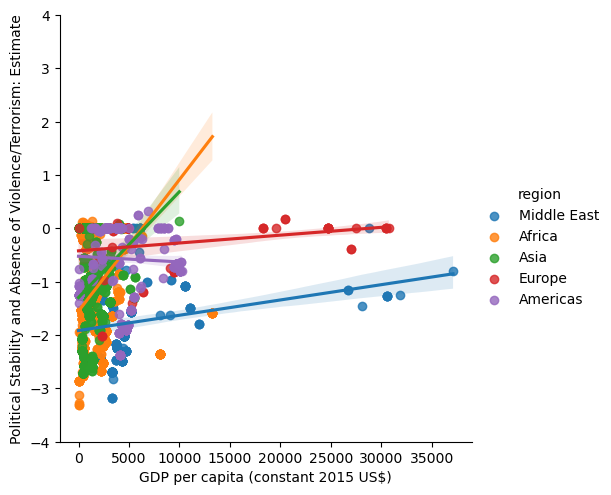

In [250]:
import matplotlib.pyplot as plt
sns.lmplot(data = deco_clean, 
           x='GDP per capita (constant 2015 US$)', 
           y='Political Stability and Absence of Violence/Terrorism: Estimate',
          hue = "region")
plt.ylim(-4.0, 4.0)
plt.show()

#### Hypothesis testing

In [201]:
# Regression: political instability and GDP per capita
bivariate_regression(deco_clean['Political Stability and Absence of Violence/Terrorism: Estimate'], deco_clean['GDP (constant 2015 US$)'])

                                                       OLS Regression Results                                                       
Dep. Variable:     Political Stability and Absence of Violence/Terrorism: Estimate   R-squared (uncentered):                   0.150
Model:                                                                         OLS   Adj. R-squared (uncentered):              0.149
Method:                                                              Least Squares   F-statistic:                              744.3
Date:                                                             Tue, 05 Mar 2024   Prob (F-statistic):                   4.08e-151
Time:                                                                     21:24:13   Log-Likelihood:                         -6974.2
No. Observations:                                                             4233   AIC:                                  1.395e+04
Df Residuals:                                                        